# Dataset & preprocessing

As a dataset we will use the Wine dataset from the UCI Machine
Learning repository. The dataset can be loaded directly using
`sklearn.datasets.load_wine`.

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Configuration for visualization
sns.set(rc={'savefig.dpi': 300})

output_path = 'output'
os.makedirs(output_path, exist_ok=True)

wine_dataset = datasets.load_wine()
df = pd.DataFrame(wine_dataset['data'], columns=wine_dataset['feature_names'])
df['class'] = wine_dataset['target']

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Our dataset comprises 178 samples of 13 different features and three
distinct classes

In [2]:
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

features[:5], labels[:5]

(array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
         3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
         1.185e+03],
        [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
         3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
         1.480e+03],
        [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
         2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
         7.350e+02]]),
 array([0, 0, 0, 0, 0]))

# Dimensionality reduction

Since we know the labels we can use Linear Discriminant Analysis (LDA) to reduce the dimensionality of the dataset. To perform the LDA we will use the `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` class.

In [74]:
# Create LinearDiscriminantAnalysis model
model = LinearDiscriminantAnalysis(n_components=2)  # We will reduce the number of features to 2

# Fit the model and extract the transformed features
# This will perform the dimensionality reduction and we can extract the transformed features
transformed_features = model.fit(features, labels).transform(features)


Visualize the transformed data in 1D and 2D space

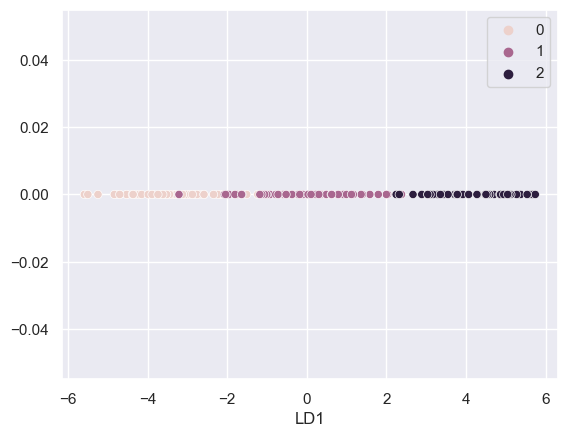

In [75]:
plot = sns.scatterplot(x=transformed_features[:, 0], y=np.zeros(shape=(features.shape[0])), hue=labels)
plt.xlabel('LD1')

plot.figure.savefig(os.path.join(output_path, 'lda1d.png'))

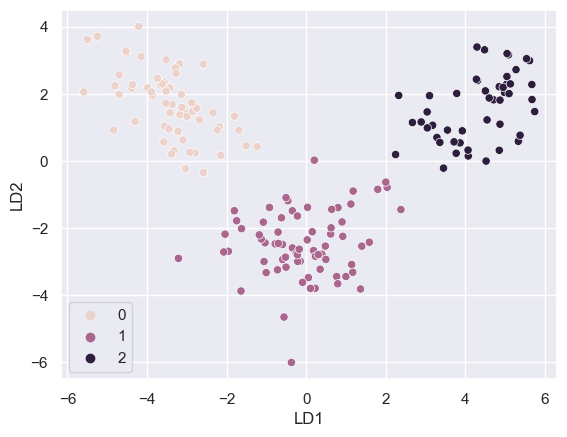

In [76]:
plot = sns.scatterplot(x=transformed_features[:, 0], y=transformed_features[:, 1], hue=labels)
plt.xlabel('LD1')
plt.ylabel('LD2')

plot.figure.savefig(os.path.join(output_path, 'lda2d.png'))

As we can see, the data is easily separable even in 1D

# Cross-validation 

To determine how well the LDA performs we will use K-fold cross-validation. To make the cross-validation more robust we can use Stratified
K-fold which ensures that each fold has the same class distribution

In [77]:
# K will be 5, this will split the data into 5 folds which will make the 80-20 train-test split
k = 5
n_samples = features.shape[0]

test_samples = int(n_samples / k)
train_samples = n_samples - test_samples

f'Total train samples: {train_samples} ({( 100 *train_samples/n_samples):.3f}%), total test samples: {test_samples} ({(100 * test_samples/n_samples):.3f}%)'

'Total train samples: 143 (80.337%), total test samples: 35 (19.663%)'

In [84]:
# Perform the cross-validation

# Create the cross-validation object - this will generate k * n_repeat runs - i.e. 50 in our case
cross_validator = RepeatedStratifiedKFold(n_splits=k, n_repeats=10, random_state=42)

# Specify scoring - we want to use accuracy, precision, recall, and f1
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
}

# Run the cross-validation
results = cross_validate(estimator=model, X=features, y=labels, cv=cross_validator, scoring=scoring)


Since we used Stratified K-fold test accuracy is good enough metric to use, however we can also use the F1-score or precision and recall.

## Visualize the performance for each score

In [85]:
def visualize(metric_values, metric_name, output_file):
    time_axis = np.arange(1, len(metric_values) + 1, dtype=int)
    
    plot = sns.lineplot(x=time_axis, y=metric_values)
    plt.xlabel('Cross-validation iteration')
    plt.ylabel(metric_name)
    
    plot.figure.savefig(os.path.join(output_path, output_file))

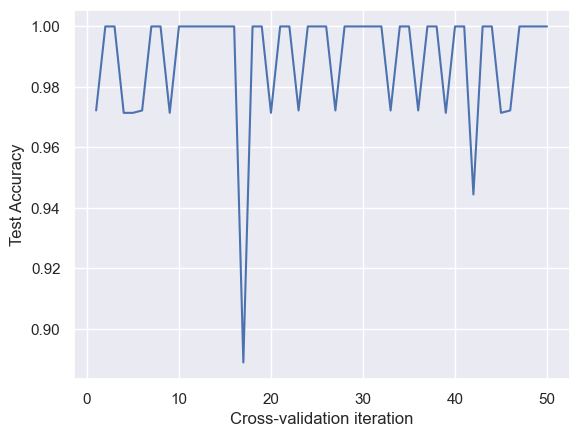

In [80]:
visualize(results['test_accuracy'], 'Test Accuracy', 'lda_accuracy.png')

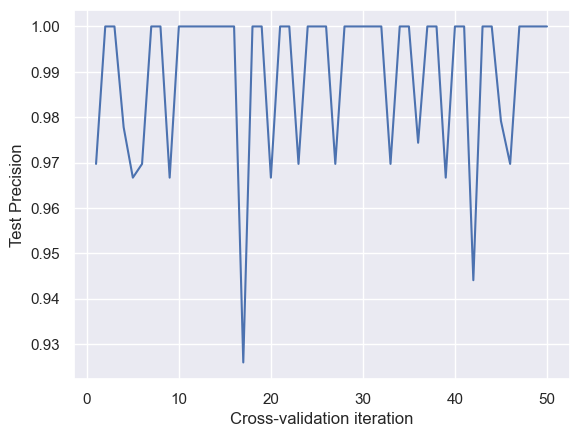

In [81]:
visualize(results['test_precision'], 'Test Precision', 'lda_precision.png')

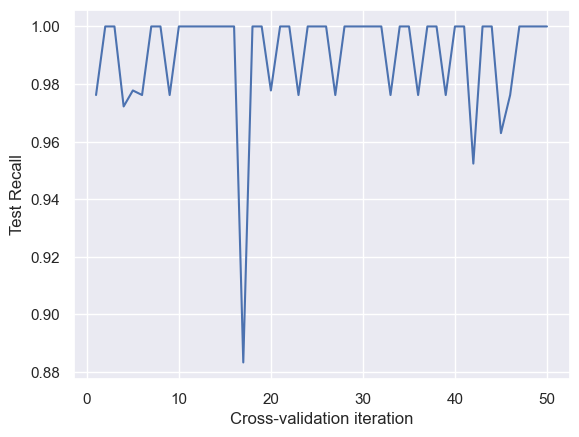

In [82]:
visualize(results['test_recall'], 'Test Recall', 'lda_recall.png')

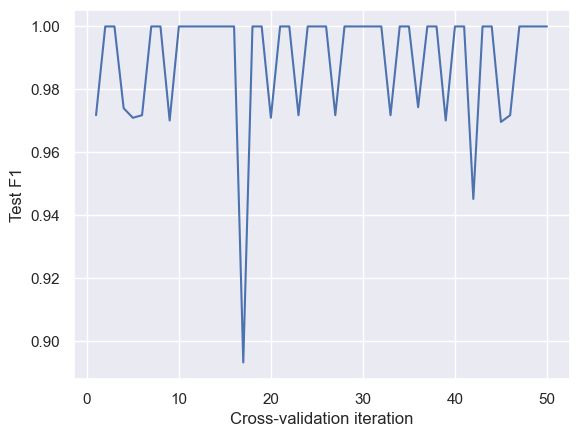

In [83]:
visualize(results['test_f1'], 'Test F1', 'lda_f1.png')

In [69]:
# Compute average stats
avg_accuracy = np.mean(results['test_accuracy'])
avg_precision = np.mean(results['test_precision'])
avg_recall = np.mean(results['test_recall'])
avg_f1 = np.mean(results['test_f1'])

print(f'Average accuracy: {avg_accuracy:.3f}')
print(f'Average precision: {avg_precision:.3f}')
print(f'Average recall: {avg_recall:.3f}')
print(f'Average F1: {avg_f1:.3f}')

Average accuracy: 0.989
Average precision: 0.990
Average recall: 0.990
Average F1: 0.989


As we can see the LDA performs very well in every metric, though this is mostly because the dataset is very easy to classify
after the dimensionality reduction.